In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
pip install category_encoders

     |████████████████████████████████| 69 kB 682 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from category_encoders import OneHotEncoder
from category_encoders import OrdinalEncoder
from category_encoders import BinaryEncoder
from category_encoders import HelmertEncoder
from category_encoders import TargetEncoder
from category_encoders import HashingEncoder
from category_encoders import WOEEncoder

In [10]:
import warnings
warnings.filterwarnings('ignore')

### Question:1

In [4]:
df_gapminder = pd.read_csv('gapminder.csv')

In [5]:
df_gapminder.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [6]:
df_gapminder.Region.value_counts()

Europe & Central Asia         41
Sub-Saharan Africa            40
America                       27
East Asia & Pacific           14
Middle East & North Africa    10
South Asia                     7
Name: Region, dtype: int64

### One-hot-Encoding

In [11]:
one_hot_encoded_data = pd.get_dummies(df_gapminder, columns = ['Region'])

one_hot_encoded_data

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region_America,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,0,0,0,1,0,0
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,0,0,0,0,0,1
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,1,0,0,0,0,0
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,0,0,1,0,0,0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,3350832.0,2.11,0.5,2.489764,26.39123,15317.0,124.2604,76.0,13.0,1,0,0,0,0,0
135,26952719.0,2.46,0.1,4.476669,25.32054,3733.0,124.3462,68.7,49.2,0,0,1,0,0,0
136,86589342.0,1.86,0.4,1.479347,20.91630,4085.0,121.9367,75.4,26.2,0,1,0,0,0,0
137,13114579.0,5.88,13.6,0.148982,20.68321,3039.0,132.4493,52.0,94.9,0,0,0,0,0,1


### Label-Encoding

In [12]:
labelencoder = LabelEncoder()

In [14]:
df_gapminder['Region'] = labelencoder.fit_transform(df_gapminder['Region'])

df_gapminder

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,3
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,5
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,0
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,2
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,1
...,...,...,...,...,...,...,...,...,...,...
134,3350832.0,2.11,0.5,2.489764,26.39123,15317.0,124.2604,76.0,13.0,0
135,26952719.0,2.46,0.1,4.476669,25.32054,3733.0,124.3462,68.7,49.2,2
136,86589342.0,1.86,0.4,1.479347,20.91630,4085.0,121.9367,75.4,26.2,1
137,13114579.0,5.88,13.6,0.148982,20.68321,3039.0,132.4493,52.0,94.9,5


### For Region column in gapminder One-Hot-Encoding will go better because datapoints are not following an order.

## Wine DataSet

In [15]:
df_wine = pd.read_csv('wine_data_UCI.csv')

In [18]:
df_wine.head()

,quality,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [19]:
df_wine = df_wine[['Alcohol', 'Malicacid']]

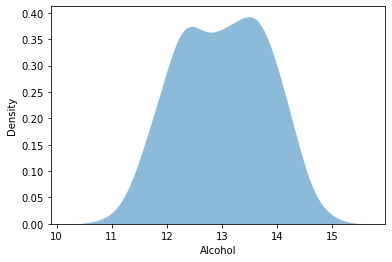

In [22]:
sns.kdeplot(
   data=df_wine, x="Alcohol",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
plt.show()


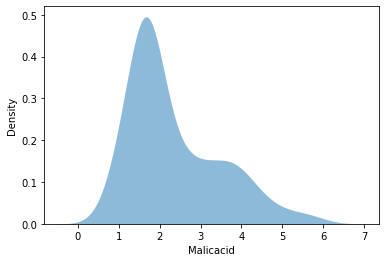

In [23]:
sns.kdeplot(
   data=df_wine, x="Malicacid",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
plt.show()


### Question:2

Do you think feature scaling is required? If yes - Why, If no - why?

### Solution:2

Yes I think Feature Scaling is required for Alcohol and Malicacid features of wine dataset because of its magnitude.

## Noramlization 

In [24]:
X = df_wine['Alcohol']
y = df_wine['Malicacid']
X = X.to_numpy()
y = y.to_numpy()

In [27]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer().fit([X])
normalizer.transform([X]).round(2)


array([[0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.09, 0.08, 0.08,
        0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.07,
        0.08, 0.07, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08,
        0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08,
        0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08,
        0.08, 0.08, 0.08, 0.08, 0.07, 0.07, 0.07, 0.08, 0.07, 0.07, 0.07,
        0.08, 0.07, 0.08, 0.07, 0.07, 0.08, 0.08, 0.07, 0.07, 0.07, 0.07,
        0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.08, 0.07, 0.07, 0.07, 0.07,
        0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07,
        0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07,
        0.07, 0.07, 0.07, 0.07, 0.07, 0.06, 0.07, 0.07, 0.07, 0.07, 0.07,
        0.07, 0.07, 0.08, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07,
        0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.08, 0.07, 0.07, 0.08, 0.08,
        0.08, 0.07, 0.08, 0.08, 0.07, 

In [28]:
normalizer = Normalizer().fit([y])
normalizer.transform([y]).round(2)

array([[0.05, 0.05, 0.07, 0.06, 0.08, 0.05, 0.05, 0.06, 0.05, 0.04, 0.06,
        0.04, 0.05, 0.05, 0.05, 0.05, 0.06, 0.05, 0.05, 0.09, 0.05, 0.11,
        0.05, 0.05, 0.05, 0.06, 0.05, 0.05, 0.06, 0.05, 0.04, 0.05, 0.05,
        0.04, 0.05, 0.05, 0.05, 0.05, 0.04, 0.12, 0.05, 0.11, 0.05, 0.12,
        0.05, 0.12, 0.1 , 0.05, 0.06, 0.05, 0.05, 0.05, 0.05, 0.06, 0.05,
        0.05, 0.05, 0.06, 0.04, 0.03, 0.03, 0.04, 0.04, 0.03, 0.04, 0.04,
        0.03, 0.03, 0.03, 0.03, 0.05, 0.04, 0.05, 0.05, 0.03, 0.05, 0.03,
        0.08, 0.03, 0.11, 0.03, 0.05, 0.03, 0.11, 0.03, 0.03, 0.05, 0.05,
        0.06, 0.04, 0.05, 0.04, 0.04, 0.08, 0.06, 0.04, 0.06, 0.04, 0.03,
        0.09, 0.06, 0.04, 0.07, 0.05, 0.05, 0.07, 0.05, 0.05, 0.04, 0.04,
        0.11, 0.07, 0.08, 0.02, 0.04, 0.04, 0.04, 0.05, 0.1 , 0.1 , 0.07,
        0.06, 0.13, 0.17, 0.12, 0.06, 0.04, 0.06, 0.05, 0.12, 0.04, 0.09,
        0.07, 0.1 , 0.04, 0.07, 0.14, 0.16, 0.1 , 0.09, 0.08, 0.07, 0.09,
        0.14, 0.11, 0.1 , 0.15, 0.13, 

## Standerization

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform([X])
sc.transform([X])


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]])

In [31]:
sc.fit_transform([y])
sc.transform([y])

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]])

### Question:3

If you feel feature scaling is required, then perform Standardization and Normalization and
provide your result. What is the difference you observe between these two methods?

### Solution:3

Normalization Scales values between [0, 1] or [-1, 1] while standerization is not bounded to a certain range.
In Normalization Minimum and maximum value of features are used for scaling while 
in standerization Mean and standard deviation is used for scaling

### Question:4

Facebook has a content team that labels pieces of content on the platform as spam or not spam. 
90% of them are diligent raters and will correctly label 95% of the time. 
The remaining 10% are non-diligent raters and will label 50% of the content incorrectly. Assume the pieces of
content are labeled independently from one another, for every rater. Given that a piece has
been rated as non-spam, what is the probability that is it actually non-spam?

### Solution:4

Let's say P(DILIGENT) is probability of the label going to a diligent raters and P(NON-DILIGENT) is for a label to go to non-diligent raters.

So


P(DILIGENT) = 0.9
P(NON-DILIGENT) = 0.1


When the labelling goes to P(DILIGENT), they have a probability of 0.95 that they will correctly label. i.e. P(DILIGENT) AND P(CORRECT) = 0.9 * 0.95 = 0.855
When the labelling goes to P(NON-DILIGENT), they have a probability of 0.05 that they will correctly label. i.e. P(NON-DILIGENT) AND P(CORRECT) = 0.1 * 0.05 = 0.005


So 


P(CORRECT) = P(DILIGENT) AND P(CORRECT) + P(NON-DILIGENT) AND P(CORRECT)
              = 0.855 + 0.005
              = 0.86



### Question:5

If the probability of seeing a car on the highway in 30 minutes is 0.95, what is the
probability of seeing a car on the highway in 10 minutes? (Assume a constant default
probability)

### Solution:5

The number of arriving cars follows Poisson distribution, with  𝜆 , where
𝜆=𝜇𝑇 
where  𝜇 is the avarege number of cars in a minute,  𝑇  is the length of time interval (in minutes).

Lets calculate \lambda for the 30-minute interval. Observing at least one car has 0.95 prbability, 
observing no car has 0.05, its equal to  exp−𝜆 

exp−𝜆=0.05𝜆=−log(0.05)=3 
𝐴𝑠 T=30

𝜇=𝜆/𝑇=3/30=1/10 

This means that 0.1 car arrives on average per minutes (so every 10 minutes a car arrives in the long term)
Observing a car in X minutes:

𝜆=𝜇𝑇=𝑋/10 
𝑃=1−exp−𝜆=1−exp−𝜇𝑋=1−𝑒𝑥𝑝(−𝑋/10) 

So for 𝑋=10 
𝑃=1−𝑒𝑥𝑝−1≈0.67


### Question:6

A machine produces items of which 1% at random are defective. How many items can be
packed in a box while keeping the chance of one or more defectives in the box to be no more
than 0.5? What are the expected value and standard deviation of the number of defectives in a
box of that size?

### Solution:6

Let us Suppose X is the number of defectives and items which are packed into a box is n.
P(X=0)= 0.9n, so that P(X ≥ 1) = 1-0.99n.
To get ensure 1-0.99n< 0.5 we must take n < log 0.5/ log 0.99 = 68.97 so n = 68.
The expected value and standard deviation of X when n = 68 are 0.68 and √0.68 × 0.99 = 0.82.